# Python for Finance - 5 - Time Series Analysis

* Author: Cleiber Garcia
* Date: November/2023

* Goal: I taught myself how to use Python with financial data for making predictions. I put together this notebook while taking an online course called Python para Finanças ('Python for Finance') on Udemy, taught by Jones Granatyr (from IA Expert Academy). This notebook closely mirrors the one covered in class, with the effort I made to infuse my personal touch whenever possible and appropriate. I assure you that I meticulously wrote it line by line.

* Disclaimer: **Please be advised that all forecasts and patterns developed in the course of this training are 
intended solely for educational purposes. Under no circumstances should they be construed as 
investment advice.**

For more information please contact me at cleiber.garcia@gmail.com

# Summary <a id='Summary'></a>
* [1. Initial Setup](#InitialSetup)
* [2. Exploring the Working Time Series](#ExploringTimeSeries)
* [3. Forecasting Using ARIMA](#ForecastingWithArima)
* [4. Time Series in Financial Databases - Facebook Prophet](#FacebookProphet)
* [5. Forecastings for `AMBEV` Utilizing Facebook Prophet](#ForecastingsAmbev)

# 1. Initial Setup <a id='InitialSetup'></a>

## 1.1 Installing Python Module pmdarima

In [3]:
!pip install pmdarima

## 1.2 Importing Python Modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## 1.3 Preparing the Working Dataset

In [7]:
dateparse = lambda dates:datetime.datetime.strptime(dates, '%Y-%m-%d')

dataset = pd.read_csv('acoes_new.csv', parse_dates=['Date'], index_col='Date',
                     date_parser=dateparse, usecols=['Date', 'BOVA'])

In [8]:
dataset

BOVA
Date                  
2015-01-02   47.259998
2015-01-05   46.320000
2015-01-06   46.580002
2015-01-07   48.150002
2015-01-08   48.509998
...                ...
2023-10-24  110.239998
2023-10-25  109.349998
2023-10-26  111.400002
2023-10-27  109.849998
2023-10-30  108.959999

[2169 rows x 1 columns]

In [11]:
time_series = dataset['BOVA']
time_series

Date
2015-01-02     47.259998
2015-01-05     46.320000
2015-01-06     46.580002
2015-01-07     48.150002
2015-01-08     48.509998
                 ...    
2023-10-24    110.239998
2023-10-25    109.349998
2023-10-26    111.400002
2023-10-27    109.849998
2023-10-30    108.959999
Name: BOVA, Length: 2169, dtype: float64

[Summary](#Summary)

# 2. Exploring the Working Time Series <a id='ExploringTimeSeries'></a>

## 2.1 Printing Different Time Intervals

In [12]:
# Print the time series for BOVA
time_series

Date
2015-01-02     47.259998
2015-01-05     46.320000
2015-01-06     46.580002
2015-01-07     48.150002
2015-01-08     48.509998
                 ...    
2023-10-24    110.239998
2023-10-25    109.349998
2023-10-26    111.400002
2023-10-27    109.849998
2023-10-30    108.959999
Name: BOVA, Length: 2169, dtype: float64

In [13]:
# Print BOVA values for 2023-09-01 to 2023-09-30
time_series['2023-09-01':'2023-09-30']

Date
2023-09-01    114.050003
2023-09-04    114.139999
2023-09-05    113.620003
2023-09-06    112.250000
2023-09-08    111.660004
2023-09-11    113.480003
2023-09-12    114.220001
2023-09-13    114.459999
2023-09-14    115.589996
2023-09-15    114.919998
2023-09-18    114.650002
2023-09-19    114.099998
2023-09-20    115.029999
2023-09-21    112.599998
2023-09-22    112.610001
2023-09-25    112.570000
2023-09-26    110.650002
2023-09-27    110.699997
2023-09-28    112.180000
2023-09-29    113.150002
Name: BOVA, dtype: float64

In [14]:
# Print BOVA values for the year of 2020
time_series['2020']

Date
2020-01-02    114.239998
2020-01-03    113.800003
2020-01-06    112.589996
2020-01-07    112.239998
2020-01-08    111.949997
                 ...    
2020-12-22    112.250000
2020-12-23    113.139999
2020-12-28    114.699997
2020-12-29    114.970001
2020-12-30    115.550003
Name: BOVA, Length: 248, dtype: float64

In [17]:
# Print the time series minimum value
time_series.index.min()

Timestamp('2015-01-02 00:00:00')

In [25]:
# Print the time series' maximum value 
time_series.index.max()

Timestamp('2023-10-30 00:00:00')

## 2.2 Plotting Different Time Intervals

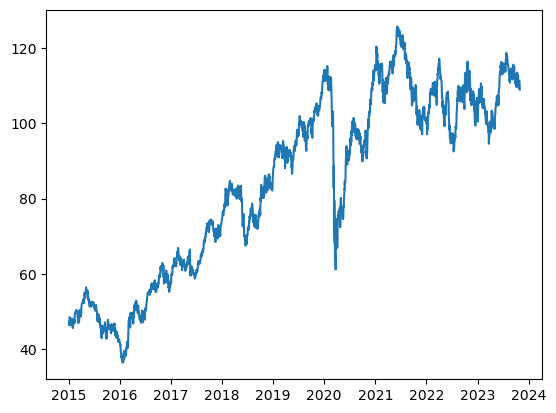

In [18]:
# Plot the whole time series
plt.plot(time_series);

In [19]:
figura = px.line(title='Histórico do preço das ações')
figura.add_scatter(x=time_series.index, y=time_series)

In [22]:
time_series_dates = time_series['2022-01-01':'2022-12-31']
time_series_dates

Date
2022-01-03     99.930000
2022-01-04     99.570000
2022-01-05     97.099998
2022-01-06     97.849998
2022-01-07     98.699997
                 ...    
2022-12-23    106.000000
2022-12-26    105.150002
2022-12-27    104.900002
2022-12-28    106.800003
2022-12-29    105.949997
Name: BOVA, Length: 250, dtype: float64

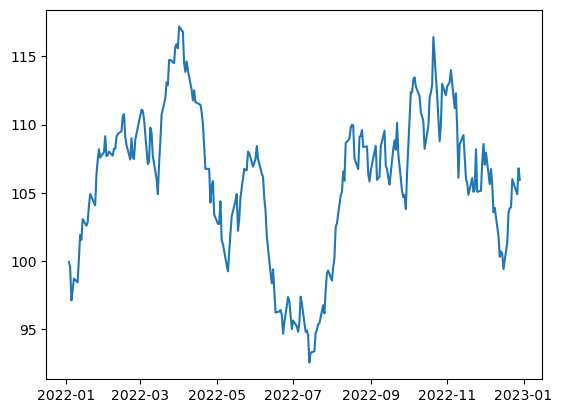

In [24]:
# Plot the time series for the year 2022
plt.plot(time_series_dates);

## 2.3 Decomposing the Time Series

In [26]:
type(time_series)

pandas.core.series.Series

In [27]:
len(time_series)

2169

In [28]:
# The parameter len(time_series) // 2 is necessary since the series is not
# a frequency of values, as it woult it be if it whas quantity of products sold,
# for example

# The reason for dividing by 2 is that the model asks for at least 2 cycles
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [29]:
# Seasonal depends on the type of the company beeing analysed
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

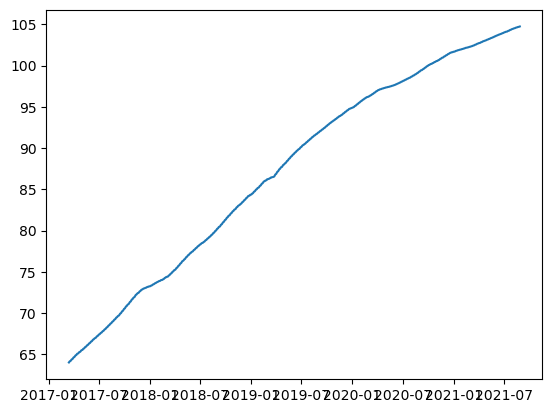

In [30]:
plt.plot(tendencia)

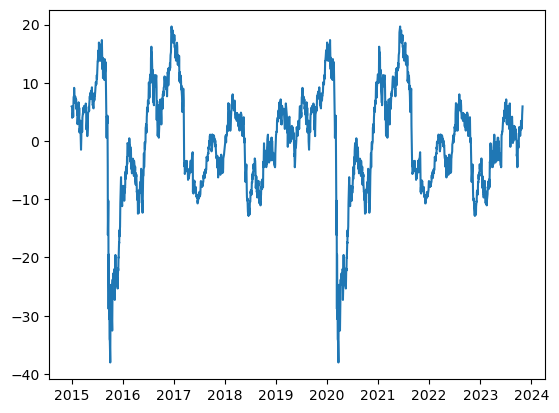

In [31]:
plt.plot(sazonal);

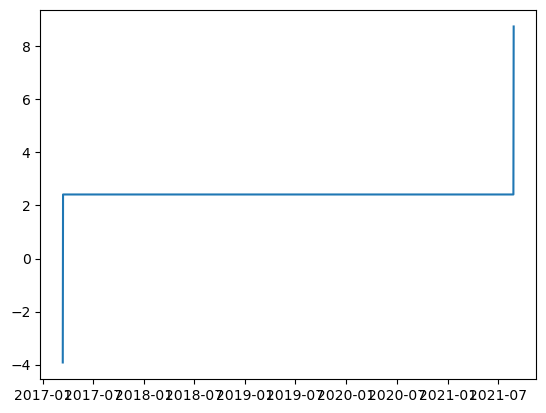

In [33]:
plt.plot(aleatorio);

[Summary](#Summary)

# 3. Forecasting Using ARIMA <a id='ForecastingWithArima'></a>

## 3.1 Building the Models

In [34]:
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')

In [35]:
# Paremeters P, Q and D
modelo.order

(2, 1, 2)

In [36]:
previsoes = modelo.predict(n_periods=90)

C:\Users\Cleiber\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [37]:
previsoes

2169    109.027760
2170    108.885233
2171    109.057678
2172    108.890471
2173    109.029159
           ...    
2254    108.969089
2255    108.969089
2256    108.969089
2257    108.969089
2258    108.969089
Length: 90, dtype: float64

In [40]:
len(time_series)

2169

In [43]:
treinamento_qty = int(0.7 * len(time_series))
treinamento_qty

1518

In [44]:
treinamento = time_series[:treinamento_qty]
treinamento.shape

(1518,)

In [45]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2021-03-23 00:00:00'))

In [51]:
teste = time_series[treinamento_qty:]
teste.shape

(651,)

In [52]:
teste_qty = len(time_series) - treinamento_qty
teste_qty

651

In [47]:
teste.index.min(), teste.index.max()

(Timestamp('2021-03-24 00:00:00'), Timestamp('2023-10-30 00:00:00'))

In [48]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [49]:
teste.index

DatetimeIndex(['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
               '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-05',
               '2021-04-06', '2021-04-07',
               ...
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20',
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30'],
              dtype='datetime64[ns]', name='Date', length=651, freq=None)

In [54]:
previsoes = pd.DataFrame(modelo2.predict(n_periods=teste_qty).values, index=teste.index)
previsoes.columns = ['previsoes']
previsoes

C:\Users\Cleiber\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



previsoes
Date                  
2021-03-24  109.922053
2021-03-25  109.172390
2021-03-26  109.476234
2021-03-29  109.431678
2021-03-30  109.423938
...                ...
2023-10-24  109.065665
2023-10-25  109.065665
2023-10-26  109.065665
2023-10-27  109.065665
2023-10-30  109.065665

[651 rows x 1 columns]

In [55]:
teste

Date
2021-03-24    107.870003
2021-03-25    109.379997
2021-03-26    110.279999
2021-03-29    110.959999
2021-03-30    112.430000
                 ...    
2023-10-24    110.239998
2023-10-25    109.349998
2023-10-26    111.400002
2023-10-27    109.849998
2023-10-30    108.959999
Name: BOVA, Length: 651, dtype: float64

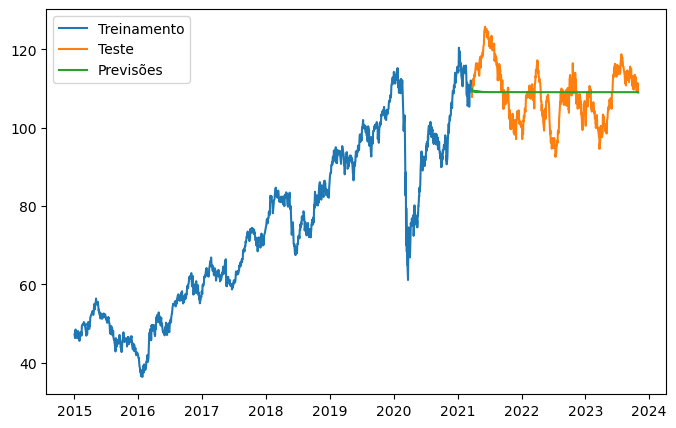

In [56]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

## 3.2 ARIMA Evaluation

In [57]:
sum(abs(teste - previsoes['previsoes']) / len(teste))

5.733126563915472

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(teste, previsoes)

5.733126563915476

[Summary](#Summary)

# 4. Time Series in Financial Databases - Facebook Prophet. <a id='FacebookProphet'></a>

## 4.1 Instalalling and Importing Python Modules

In [60]:
!pip install prophet

     ---------------------------------------- 13.3/13.3 MB 1.7 MB/s eta 0:00:00
     ------------------------------------ 822.9/822.9 kB 852.8 kB/s eta 0:00:00
     ---------------------------------------- 93.0/93.0 kB 1.3 MB/s eta 0:00:00


In [61]:
from prophet import Prophet
import pandas as pd

## 4.2 Loading the Working Dataset

In [62]:
dataset = pd.read_csv('acoes_new.csv', usecols=['Date', 'BOVA'])
dataset

Date        BOVA
0     2015-01-02   47.259998
1     2015-01-05   46.320000
2     2015-01-06   46.580002
3     2015-01-07   48.150002
4     2015-01-08   48.509998
...          ...         ...
2164  2023-10-24  110.239998
2165  2023-10-25  109.349998
2166  2023-10-26  111.400002
2167  2023-10-27  109.849998
2168  2023-10-30  108.959999

[2169 rows x 2 columns]

In [63]:
dataset = dataset[['Date', 'BOVA']].rename(columns = {'Date': 'ds', 'BOVA': 'y'})
dataset

ds           y
0     2015-01-02   47.259998
1     2015-01-05   46.320000
2     2015-01-06   46.580002
3     2015-01-07   48.150002
4     2015-01-08   48.509998
...          ...         ...
2164  2023-10-24  110.239998
2165  2023-10-25  109.349998
2166  2023-10-26  111.400002
2167  2023-10-27  109.849998
2168  2023-10-30  108.959999

[2169 rows x 2 columns]

## 4.3 Building and Utilizing the Forecast Model

In [66]:
# Instantiate an object of the class Prophet
modelo = Prophet()

In [67]:
# Fit the dataset to the model
modelo.fit(dataset)

13:16:41 - cmdstanpy - INFO - Chain [1] start processing
13:16:42 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
# Set the time for forecasting
futuro = modelo.make_future_dataframe(periods=90)

In [69]:
# Make the forecastings
previsoes = modelo.predict(futuro)

In [70]:
# Print the 5 fisrst rows of forecastings
previsoes.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-01-02  49.429181   44.023640   57.509197    49.429181    49.429181   
1 2015-01-05  49.397071   44.256505   58.215021    49.397071    49.397071   
2 2015-01-06  49.386368   44.260599   57.629693    49.386368    49.386368   
3 2015-01-07  49.375665   44.493696   58.318398    49.375665    49.375665   
4 2015-01-08  49.364961   44.534664   57.916179    49.364961    49.364961   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        1.147349              1.147349              1.147349  0.580296   
1        1.532485              1.532485              1.532485  0.534833   
2        1.671625              1.671625              1.671625  0.527061   
3        1.819001              1.819001              1.819001  0.528388   
4        1.932573              1.932573              1.932573  0.498239   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.580296      0.580296  0.567053      0.567053      0.567053   
1      0.534833      0.534833  0.997652      0.997652      0.997652   
2      0.527061      0.527061  1.144564      1.144564      1.144564   
3      0.528388      0.528388  1.290612      1.290612      1.290612   
4      0.498239      0.498239  1.434333      1.434333      1.434333   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  50.576530  
1                         0.0  50.929556  
2                         0.0  51.057993  
3                         0.0  51.194665  
4                         0.0  51.297534

In [71]:
len(dataset)

2169

In [72]:
len(previsoes)

2259

In [73]:
len(previsoes) - len(dataset)

90

In [76]:
previsoes.tail(90)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2169 2023-10-31  109.938766  103.101914  117.821593   109.938766   109.938766   
2170 2023-11-01  109.949856  103.329751  116.832458   109.949856   109.949856   
2171 2023-11-02  109.960945  103.253567  116.593233   109.960945   109.960945   
2172 2023-11-03  109.972035  103.093735  117.445745   109.972035   109.972035   
2173 2023-11-04  109.983125  100.949252  114.739043   109.983125   109.983125   
...         ...         ...         ...         ...          ...          ...   
2254 2024-01-24  110.881390  106.778738  121.293790   110.131553   111.932947   
2255 2024-01-25  110.892479  107.031894  121.568957   110.086710   111.958002   
2256 2024-01-26  110.903569  106.924475  121.507334   110.071917   112.005772   
2257 2024-01-27  110.914659  105.542484  119.762917   110.054360   112.026987   
2258 2024-01-28  110.925748  105.893495  119.677705   110.045763   112.048929   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2169        0.383033              0.383033              0.383033  0.527061   
2170        0.276990              0.276990              0.276990  0.528388   
2171        0.137739              0.137739              0.137739  0.498239   
2172        0.110871              0.110871              0.110871  0.580296   
2173       -1.910686             -1.910686             -1.910686 -1.334409   
...              ...                   ...                   ...       ...   
2254        3.309073              3.309073              3.309073  0.528388   
2255        3.307575              3.307575              3.307575  0.498239   
2256        3.415527              3.415527              3.415527  0.580296   
2257        1.524896              1.524896              1.524896 -1.334409   
2258        1.548017              1.548017              1.548017 -1.334410   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2169      0.527061      0.527061 -0.144028     -0.144028     -0.144028   
2170      0.528388      0.528388 -0.251398     -0.251398     -0.251398   
2171      0.498239      0.498239 -0.360500     -0.360500     -0.360500   
2172      0.580296      0.580296 -0.469425     -0.469425     -0.469425   
2173     -1.334409     -1.334409 -0.576278     -0.576278     -0.576278   
...            ...           ...       ...           ...           ...   
2254      0.528388      0.528388  2.780685      2.780685      2.780685   
2255      0.498239      0.498239  2.809336      2.809336      2.809336   
2256      0.580296      0.580296  2.835231      2.835231      2.835231   
2257     -1.334409     -1.334409  2.859304      2.859304      2.859304   
2258     -1.334410     -1.334410  2.882427      2.882427      2.882427   

      multiplicative_terms  multiplicative_terms_lower  \
2169                   0.0                         0.0   
2170                   0.0                         0.0   
2171                   0.0                         0.0   
2172                   0.0                         0.0   
2173                   0.0                         0.0   
...                    ...                         ...   
2254                   0.0                         0.0   
2255                   0.0                         0.0   
2256                   0.0                         0.0   
2257                   0.0                         0.0   
2258                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
2169                         0.0  110.321799  
2170                         0.0  110.226846  
2171                         0.0  110.098684  
2172                         0.0  110.082906  
2173                         0.0  108.072438  
...                          ...         ...  
2254                         0.0  114.190463  
2255                         0.0  114.200054  
2256                         0.0  114.319096  
2257                         0.0  112.439554  


## 4.4 Plotting the Graphics for the Forecastings

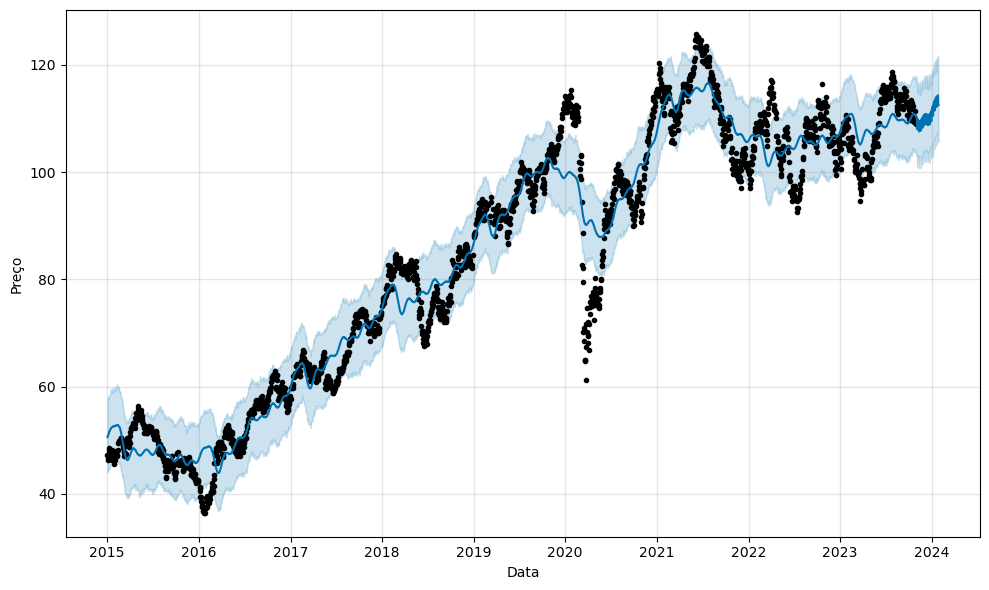

In [77]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

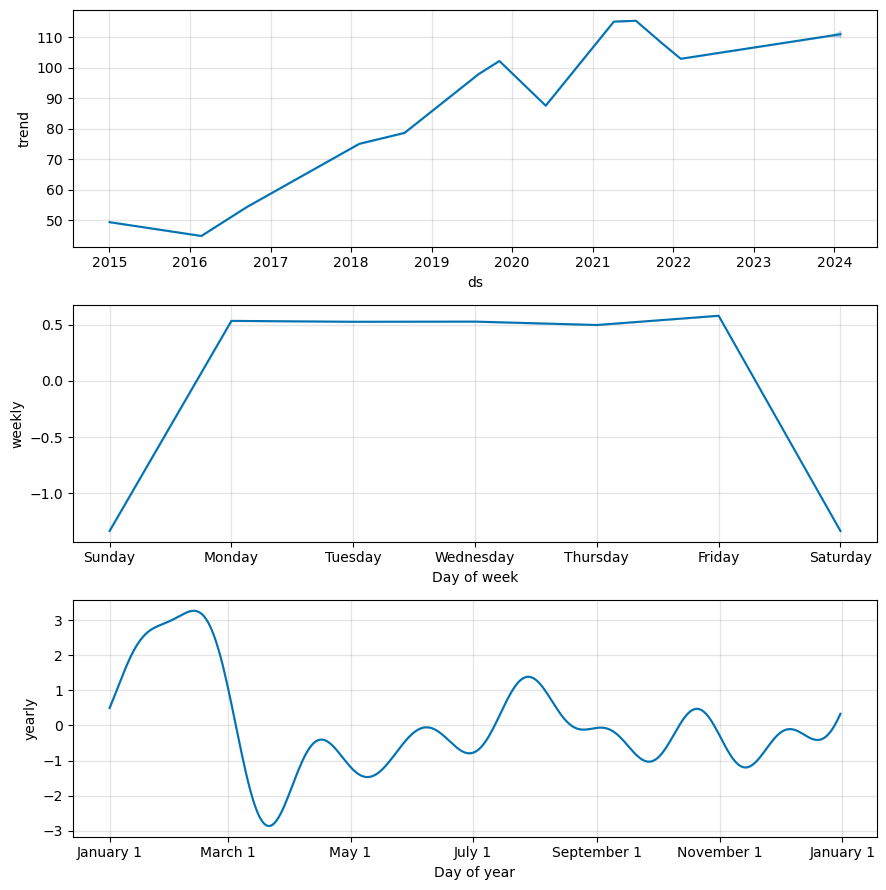

In [78]:
modelo.plot_components(previsoes);

In [79]:
from prophet.plot import plot_plotly, plot_components_plotly

In [81]:
plot_plotly(modelo, previsoes)

In [82]:
plot_components_plotly(modelo, previsoes)

## 4.5 Forecasting Evaluation

In [83]:
teste.shape

(651,)

In [84]:
teste.tail()

Date
2023-10-24    110.239998
2023-10-25    109.349998
2023-10-26    111.400002
2023-10-27    109.849998
2023-10-30    108.959999
Name: BOVA, dtype: float64

In [85]:
pred = modelo.make_future_dataframe(periods=0)

In [86]:
previsoes = modelo.predict(pred)

In [87]:
previsoes.shape

(2169, 19)

In [88]:
previsoes.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2164 2023-10-24  109.861138  104.243046  117.871276   109.861138   109.861138   
2165 2023-10-25  109.872228  103.919544  117.549420   109.872228   109.872228   
2166 2023-10-26  109.883317  104.054682  117.867980   109.883317   109.883317   
2167 2023-10-27  109.894407  103.655929  117.622172   109.894407   109.894407   
2168 2023-10-30  109.927676  103.878084  117.683150   109.927676   109.927676   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2164        0.939839              0.939839              0.939839  0.527061   
2165        0.892887              0.892887              0.892887  0.528388   
2166        0.801991              0.801991              0.801991  0.498239   
2167        0.811862              0.811862              0.811862  0.580296   
2168        0.494559              0.494559              0.494559  0.534833   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2164      0.527061      0.527061  0.412778      0.412778      0.412778   
2165      0.528388      0.528388  0.364499      0.364499      0.364499   
2166      0.498239      0.498239  0.303752      0.303752      0.303752   
2167      0.580296      0.580296  0.231566      0.231566      0.231566   
2168      0.534833      0.534833 -0.040275     -0.040275     -0.040275   

      multiplicative_terms  multiplicative_terms_lower  \
2164                   0.0                         0.0   
2165                   0.0                         0.0   
2166                   0.0                         0.0   
2167                   0.0                         0.0   
2168                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
2164                         0.0  110.800977  
2165                         0.0  110.765115  
2166                         0.0  110.685308  
2167                         0.0  110.706269  
2168                         0.0  110.422235

In [89]:
previsoes = previsoes['yhat'].tail(365)

In [92]:
previsoes

1804    103.385435
1805    103.428999
1806    103.588919
1807    103.793919
1808    103.872485
           ...    
2164    110.800977
2165    110.765115
2166    110.685308
2167    110.706269
2168    110.422235
Name: yhat, Length: 365, dtype: float64

In [94]:
teste.shape

(651,)

In [97]:
previsoes.shape

(365,)

In [99]:
len(teste[286:])

365

In [101]:
# teste[286:] --> 365 rows, in order to be compatible 
# with previsoes.shape
mean_absolute_error(teste[286:], previsoes)

4.430546127329564

[Summary](#Summary)

# 5. Forecastings for `AMBEV` Utilizing Facebook Prophet <a id='ForecastingsAmbev'></a>

## 5.1 Importing Python Modules and Loading the Working Dataset

In [118]:
# Importing Python Module
from prophet import Prophet

In [102]:
# Loading the working dataset for columns Date and AMBEV only
# Changind columns names
dataset = pd.read_csv('acoes_ex.csv', usecols = ['Date', 'AMBEV'])
dataset = dataset[['Date', 'AMBEV']].rename(columns = {'Date': 'ds', 'AMBEV': 'y'})
dataset

ds          y
0     2015-01-02  16.020000
1     2015-01-05  15.730000
2     2015-01-06  16.330000
3     2015-01-07  16.559999
4     2015-01-08  16.540001
...          ...        ...
2188  2023-10-19  12.520000
2189  2023-10-20  12.490000
2190  2023-10-23  12.480000
2191  2023-10-24  12.520000
2192  2023-10-25  12.440000

[2193 rows x 2 columns]

## 5.2 Building and Utilizing the Forecast Model

In [119]:
# Instantiate an object of the class Prophet
modelo = Prophet()

In [120]:
# Fit the dataset to the model
modelo.fit(dataset)

15:27:48 - cmdstanpy - INFO - Chain [1] start processing
15:27:50 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
# Set the time for forecasting
futuro = modelo.make_future_dataframe(periods=90)

In [122]:
# Make the forecastings
previsoes = modelo.predict(futuro)

In [123]:
# Print the 5 fisrst rows of forecastings
previsoes.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-01-02  17.837868   16.678837   19.008976    17.837868    17.837868   
1 2015-01-05  17.846587   16.770455   19.047490    17.846587    17.846587   
2 2015-01-06  17.849494   16.748845   19.171818    17.849494    17.849494   
3 2015-01-07  17.852400   16.726312   19.167329    17.852400    17.852400   
4 2015-01-08  17.855306   16.699870   19.294241    17.855306    17.855306   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.037340              0.037340              0.037340  0.396366   
1        0.071518              0.071518              0.071518  0.415445   
2        0.082400              0.082400              0.082400  0.418673   
3        0.067076              0.067076              0.067076  0.394740   
4        0.087765              0.087765              0.087765  0.406091   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.396366      0.396366 -0.359026     -0.359026     -0.359026   
1      0.415445      0.415445 -0.343927     -0.343927     -0.343927   
2      0.418673      0.418673 -0.336274     -0.336274     -0.336274   
3      0.394740      0.394740 -0.327663     -0.327663     -0.327663   
4      0.406091      0.406091 -0.318327     -0.318327     -0.318327   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  17.875207  
1                         0.0  17.918105  
2                         0.0  17.931893  
3                         0.0  17.919476  
4                         0.0  17.943071

In [124]:
len(dataset)

2193

In [125]:
len(previsoes)

2283

In [126]:
len(previsoes) - len(dataset)

90

In [127]:
previsoes.tail(90)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2193 2023-10-26  13.421129   12.615796   14.895049    13.421129    13.421129   
2194 2023-10-27  13.418887   12.605689   15.055063    13.418887    13.418887   
2195 2023-10-28  13.416644   11.188719   13.515555    13.416644    13.416644   
2196 2023-10-29  13.414402   11.147862   13.697634    13.414402    13.414402   
2197 2023-10-30  13.412159   12.487709   15.047813    13.412159    13.412159   
...         ...        ...         ...         ...          ...          ...   
2278 2024-01-19  13.230523   12.072179   14.699805    12.931157    13.537835   
2279 2024-01-20  13.228281   10.653549   13.285655    12.924227    13.543298   
2280 2024-01-21  13.226038   10.550875   13.391808    12.919440    13.554624   
2281 2024-01-22  13.223796   12.004497   14.621284    12.911441    13.562790   
2282 2024-01-23  13.221553   12.027909   14.775789    12.904285    13.573822   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2193        0.365954              0.365954              0.365954  0.406091   
2194        0.361623              0.361623              0.361623  0.396366   
2195       -1.043532             -1.043532             -1.043532 -1.015657   
2196       -1.035398             -1.035398             -1.035398 -1.015658   
2197        0.404884              0.404884              0.404884  0.415445   
...              ...                   ...                   ...       ...   
2278        0.168819              0.168819              0.168819  0.396366   
2279       -1.239017             -1.239017             -1.239017 -1.015657   
2280       -1.235698             -1.235698             -1.235698 -1.015658   
2281        0.197932              0.197932              0.197932  0.415445   
2282        0.202993              0.202993              0.202993  0.418673   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2193      0.406091      0.406091 -0.040137     -0.040137     -0.040137   
2194      0.396366      0.396366 -0.034743     -0.034743     -0.034743   
2195     -1.015657     -1.015657 -0.027874     -0.027874     -0.027874   
2196     -1.015658     -1.015658 -0.019740     -0.019740     -0.019740   
2197      0.415445      0.415445 -0.010561     -0.010561     -0.010561   
...            ...           ...       ...           ...           ...   
2278      0.396366      0.396366 -0.227546     -0.227546     -0.227546   
2279     -1.015657     -1.015657 -0.223360     -0.223360     -0.223360   
2280     -1.015658     -1.015658 -0.220040     -0.220040     -0.220040   
2281      0.415445      0.415445 -0.217513     -0.217513     -0.217513   
2282      0.418673      0.418673 -0.215680     -0.215680     -0.215680   

      multiplicative_terms  multiplicative_terms_lower  \
2193                   0.0                         0.0   
2194                   0.0                         0.0   
2195                   0.0                         0.0   
2196                   0.0                         0.0   
2197                   0.0                         0.0   
...                    ...                         ...   
2278                   0.0                         0.0   
2279                   0.0                         0.0   
2280                   0.0                         0.0   
2281                   0.0                         0.0   
2282                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2193                         0.0  13.787083  
2194                         0.0  13.780510  
2195                         0.0  12.373113  
2196                         0.0  12.379004  
2197                         0.0  13.817044  
...                          ...        ...  
2278                         0.0  13.399342  
2279                         0.0  11.989264  
2280                         0.0  11.990340  
2281                         0.0  13.421728  
2282                   

## 5.3 Plotting the Graphics for the Forecastings

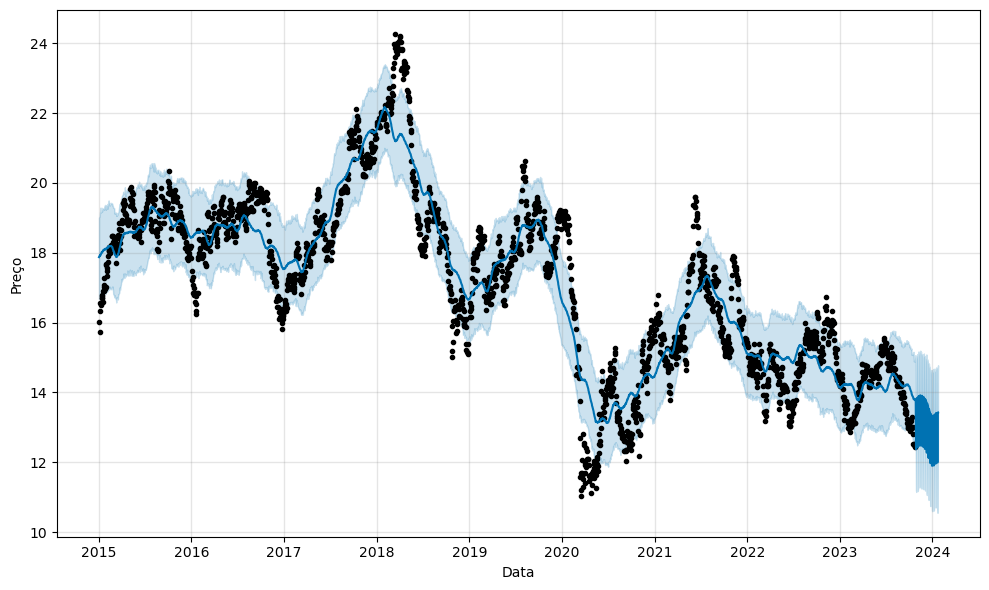

In [128]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

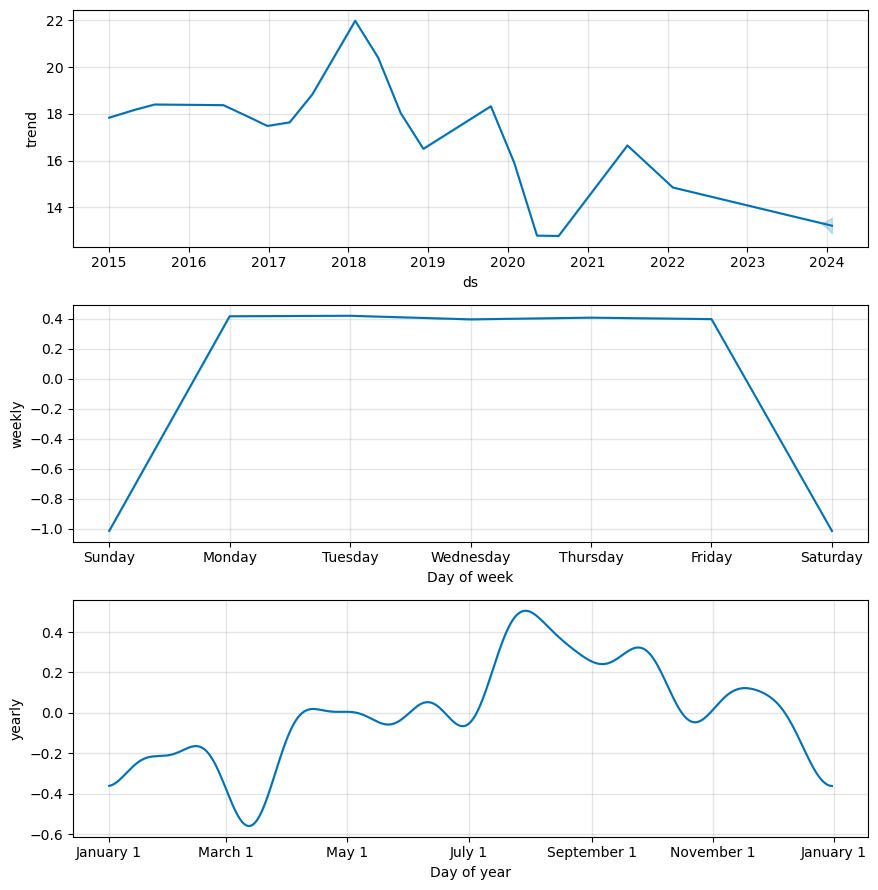

In [129]:
modelo.plot_components(previsoes);

In [131]:
from prophet.plot import plot_plotly, plot_components_plotly

In [132]:
plot_plotly(modelo, previsoes)

In [133]:
plot_components_plotly(modelo, previsoes)

## 5.4 Forecasting Evaluation

In [134]:
teste.shape

(657, 2)

In [135]:
teste.tail()

ds      y
2188  2023-10-19  12.52
2189  2023-10-20  12.49
2190  2023-10-23  12.48
2191  2023-10-24  12.52
2192  2023-10-25  12.44

In [146]:
# Setting the period for forecasting
pred = modelo.make_future_dataframe(periods=0)

In [147]:
# Making the forecasts
previsoes = modelo.predict(pred)

In [148]:
previsoes.shape

(2193, 19)

In [149]:
previsoes.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2188 2023-10-19  13.436826   12.546231   15.040304    13.436826    13.436826   
2189 2023-10-20  13.434584   12.591672   15.018780    13.434584    13.434584   
2190 2023-10-23  13.427856   12.625238   15.074227    13.427856    13.427856   
2191 2023-10-24  13.425614   12.653200   15.066559    13.425614    13.425614   
2192 2023-10-25  13.423372   12.477047   15.023001    13.423372    13.423372   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2188        0.381741              0.381741              0.381741  0.406091   
2189        0.363452              0.363452              0.363452  0.396366   
2190        0.369733              0.369733              0.369733  0.415445   
2191        0.372901              0.372901              0.372901  0.418673   
2192        0.350871              0.350871              0.350871  0.394740   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2188      0.406091      0.406091 -0.024351     -0.024351     -0.024351   
2189      0.396366      0.396366 -0.032913     -0.032913     -0.032913   
2190      0.415445      0.415445 -0.045712     -0.045712     -0.045712   
2191      0.418673      0.418673 -0.045772     -0.045772     -0.045772   
2192      0.394740      0.394740 -0.043868     -0.043868     -0.043868   

      multiplicative_terms  multiplicative_terms_lower  \
2188                   0.0                         0.0   
2189                   0.0                         0.0   
2190                   0.0                         0.0   
2191                   0.0                         0.0   
2192                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2188                         0.0  13.818567  
2189                         0.0  13.798036  
2190                         0.0  13.797589  
2191                         0.0  13.798515  
2192                         0.0  13.774243

In [150]:
# Printing forecast for yhat (last 365 days)
previsoes = previsoes['yhat'].tail(365)

In [158]:
previsoes

1828    14.981289
1829    14.978799
1830    14.975416
1831    14.945420
1832    14.951409
          ...    
2188    13.818567
2189    13.798036
2190    13.797589
2191    13.798515
2192    13.774243
Name: yhat, Length: 365, dtype: float64

In [160]:
teste['y']

1536    15.09
1537    15.03
1538    15.30
1539    15.05
1540    15.42
        ...  
2188    12.52
2189    12.49
2190    12.48
2191    12.52
2192    12.44
Name: y, Length: 657, dtype: float64

In [157]:
teste.shape

(657, 2)

In [153]:
previsoes.shape

(365,)

In [154]:
len(teste[292:])

365

In [161]:
# teste[292:] --> 365 rows, in order to be compatible 
# with previsoes.shape
mean_absolute_error(teste['y'][292:], previsoes)

0.6764171711957085

[Summary](#Summary)